**Advanced Lane Finding Project**

The goals / steps of this project are the following:

* #Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* #Apply a distortion correction to raw images.
* #Use color transforms, gradients, etc., to create a thresholded binary image.
* #Apply a perspective transform to rectify binary image ("birds-eye view").
* #Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

** TWE **
* Outlier detection
* time dependent filtering
* plausibilisierung mit lane distane 

# Camera Calibration

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle
%matplotlib inline
import importlib
import lib

In [2]:
if False:
    cam = Camera()
    cam.calibrate()
    cam.save_calibration()

In [3]:
if False:
    # Read in an image
    img = cv2.imread('camera_cal/calibration10.jpg')
    nx = 9 # the number of inside corners in x
    ny = 6 # the number of inside corners in y

    top_down, perspective_M = cam.corners_unwarp(img, nx, ny)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(top_down)
    ax2.set_title('Undistorted and Warped Image', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [4]:
if False:
    dst = cam.undistort_img(img)
    plt.imshow(dst)
    plt.show()
    #bird = cam.warp_birdeye(dst)
    #plt.imshow(bird)
    #plt.show()

In [5]:
if False:
    # Load image
    image = cv2.imread('color-shadow-example.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Choose a Sobel kernel size
    ksize = 3 # Choose a larger odd number to smooth gradient measurements

    # Apply each of the thresholding functions
    gradx = ImageFilter.abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(50, 255))
    grady = ImageFilter.abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(50, 255))
    mag_binary = ImageFilter.mag_thresh(image, sobel_kernel=ksize, mag_thresh=(100, 255))
    dir_binary = ImageFilter.dir_threshold(image, sobel_kernel=ksize, dir_thresh=(np.pi/4, np.pi/2))
    result, result2 = ImageFilter.gradient_filter(image)

    # Plot the result
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 9))
    f.tight_layout()
    ax1.imshow(gradx,cmap='gray');      ax1.set_title('gradx', fontsize=40)
    ax2.imshow(grady,cmap='gray');      ax2.set_title('grady', fontsize=40)
    ax3.imshow(mag_binary,cmap='gray'); ax3.set_title('mag_binary', fontsize=40)
    ax4.imshow(dir_binary,cmap='gray'); ax4.set_title('dir_binary', fontsize=40)

    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 9))
    f.tight_layout()
    ax1.imshow(image);  ax1.set_title('Original Image', fontsize=40)
    ax2.imshow(result); ax2.set_title('Pipeline Result', fontsize=40)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.) 

In [6]:
if False:
    #image = cv2.imread('test_images/straight_lines2.jpg')
    image = cv2.imread('test_images/test5.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ld = LaneDetector()
    images = ld.pipeline(cam, ImageFilter, image)

    # Display the final results
    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(14, 9))
    f.tight_layout()
    ax1.imshow(images['gradient']);                  ax1.set_title('gradient')
    ax2.imshow(images['image']);                     ax2.set_title('image')
    ax3.imshow(images['gradient_warp'],cmap='gray'); ax3.set_title('gradient_warp')
    ax4.imshow(images['image_warp']);                ax4.set_title('image_warp')
    ax5.imshow(images['image_fit']);                 ax5.set_title('image_fit')
    plt.show()    

In [7]:
if False:
    #data   = np.array(window_centroids)
    #ploty  = (ld.window_height/2 + np.linspace(0, 630, num=720/ld.window_height)) / 1
    #leftx  = data[:,0]
    #rightx = data[:,1]
    print(ld.previous_centroids)
    ploty  = (ld.window_height/2 + np.linspace(0, 630, num=720/ld.window_height)) / 1
    print(ploty)

    lane = LaneLine();
    lane.fit_next(ld.previous_centroids)
    lane.generate_road(300,10);
    #result = ld.draw_lanes_warped(lane, image)

In [8]:
if False:
    # Plot up the fake data
    # TODO in funktion
    plt.figure(figsize=(20,10))
    mark_size = 3
    plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
    plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
    #plt.xlim(0, 1280)
    #plt.ylim(0, 720)
    plt.xlim(0, 120)
    plt.ylim(0, 720)
    plt.imshow(np.flipud(image_warp))
    plt.plot(left_fitx, ploty, color='red', linewidth=4)
    plt.plot(right_fitx, ploty, color='red', linewidth=4)
    plt.gca().invert_yaxis() # to visualize as we do the images

    plt.figure(figsize=(20,14))
    plt.imshow(result)
    plt.show();

In [9]:
from lib.camera import Camera
from lib.image_filter import ImageFilter
from lib.lane_detector import LaneDetector
from lib.lane_line import LaneLine
importlib.reload(lib.lane_detector)
importlib.reload(lib.lane_line)
from lib.lane_detector import LaneDetector
from lib.lane_line import LaneLine
importlib.reload(lib.lane_detector)
importlib.reload(lib.lane_line)
from lib.lane_detector import LaneDetector
from lib.lane_line import LaneLine

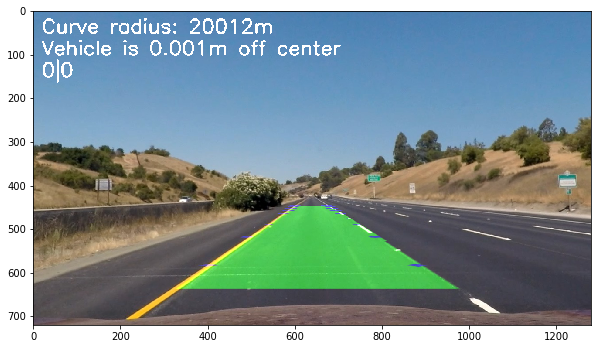

In [10]:
cam = Camera();
cam.load_calibration();
ld = LaneDetector();

def process_image(image):
    # The output you return should be a color image (3 channel) for processing video below
    images = ld.pipeline(cam, ImageFilter, image, includeDebugImages = False)
    return images['final']

image = cv2.imread('test_images/straight_lines1.jpg')
#image = cv2.imread('test_images/test3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = process_image(image)
plt.figure(figsize=(20/2,14/2))
plt.imshow(result)
plt.show();

In [11]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import time

In [12]:
video_output = 'project_video_lane_detection.mp4'
clip1 = VideoFileClip("project_video.mp4")#.subclip(1,5)
#clip1 = VideoFileClip("project_video.mp4").subclip(22,24)
#clip1 = VideoFileClip("project_video.mp4").subclip(20,26)
clip2 = clip1.fl_image(process_image)
%time clip2.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video project_video_lane_detection2.mp4
[MoviePy] Writing video project_video_lane_detection2.mp4


100%|█████████▉| 1260/1261 [03:54<00:00,  5.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_lane_detection2.mp4 

CPU times: user 5min 47s, sys: 54.3 s, total: 6min 42s
Wall time: 3min 56s


In [13]:
filename = video_output + ( "?t=" + str(time.time()) ); # disable firefox video caching by adding random number
HTML("""
<video width="960" height="540" controls>
    <source src="{0}">
</video>
""".format(filename))

In [16]:
1/0

ZeroDivisionError: division by zero

In [14]:
video_output = 'challenge_video_lane_detection.mp4'
clip1 = VideoFileClip("challenge_video.mp4")
clip2 = clip1.fl_image(process_image)
%time clip2.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video challenge_video_lane_detection.mp4
[MoviePy] Writing video challenge_video_lane_detection.mp4


100%|██████████| 485/485 [01:33<00:00,  5.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_video_lane_detection.mp4 

CPU times: user 2min 17s, sys: 21.4 s, total: 2min 38s
Wall time: 1min 34s


In [15]:
filename = video_output + ( "?t=" + str(time.time()) ); # disable firefox video caching by adding random number
HTML("""
<video width="960" height="540" controls>
    <source src="{0}">
</video>
""".format(filename))

In [17]:
video_output = 'harder_challenge_video_lane_detection.mp4'
clip1 = VideoFileClip("harder_challenge_video.mp4")
clip2 = clip1.fl_image(process_image)
%time clip2.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video harder_challenge_video_lane_detection.mp4
[MoviePy] Writing video harder_challenge_video_lane_detection.mp4


100%|█████████▉| 1199/1200 [03:36<00:00,  5.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harder_challenge_video_lane_detection.mp4 

CPU times: user 5min 25s, sys: 48.5 s, total: 6min 14s
Wall time: 3min 37s


In [18]:
filename = video_output + ( "?t=" + str(time.time()) ); # disable firefox video caching by adding random number
HTML("""
<video width="960" height="540" controls>
    <source src="{0}">
</video>
""".format(filename))

# Testing

In [ ]:
importlib.reload(lib.lane_detector)
importlib.reload(lib.lane_line)
from lib.lane_detector import LaneDetector
from lib.lane_line import LaneLine
importlib.reload(lib.lane_detector)
importlib.reload(lib.lane_line)
from lib.lane_detector import LaneDetector
from lib.lane_line import LaneLine

In [ ]:
ld = LaneDetector()
for i in range(6):
    image = cv2.imread('test_images/test%d.jpg' % (i+1))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    images = ld.pipeline(cam, ImageFilter, image)
    
    # Display the final results
    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 9))
    ax1.imshow(images['gradient']);                  ax1.set_title('gradient')
    ax2.imshow(images['image']);                     ax2.set_title('image')
    ax3.imshow(images['gradient_warp'],cmap='gray'); ax3.set_title('gradient_warp')
    ax4.imshow(images['image_warp']);                ax4.set_title('image_warp')
    ax5.imshow(images['image_fit']);                 ax5.set_title('image_fit')
    plt.show()    

In [ ]:
ld = LaneDetector()
for i in range(6):
    image = cv2.imread('test_images/test%d.jpg' % (i+1))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    images = ld.pipeline(cam, ImageFilter, image)
    
    plt.figure(figsize=(10, 9))
    plt.imshow(images['final']);
    plt.show()